**Lead Score Case Study:**

This case study will involve the prediction of whether the person identified as "Lead" by X education will convert or not , which means if the person will sign up for a course or not.

We have 37 Predictor variables to start working on the Model building

**Importing Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
pd.options.display.float_format='{:.2f}'.format

**Importing the Data :**


In [ ]:
lead_data=pd.read_csv("Leads.csv")
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

**Inspecting the Data :**

In [ ]:
# Checking the dimensions of the data frame
lead_data.shape

(9240, 37)

In [ ]:
# Analysing the Statistical Aspects of the Data

lead_data.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

In [ ]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Lead Quality has the most number of missing values followed by Asymmetique Activity index, Profile index, Activity Score and Profile score**

**Data Processing :**

In [ ]:
# Dropping the insignificant variables

lead_data=lead_data.drop(['Prospect ID','Lead Number','Country','City'],1)  # ID, Lead Number, City and Country are not going to be very useful in prediction, hence dropping them
lead_data.shape

(9240, 33)

In [ ]:
#Dropping the below variables as these columns have all values as "No", hence may not contribute to the prediction
lead_data=lead_data.drop(['Receive More Updates About Our Courses','Magazine','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)
lead_data.shape

(9240, 28)

**Finding the % of missing values in each column :**

In [ ]:
lead_data.isnull().sum()/lead_data.shape[0]*100

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

**Dropping the Columns whose % of missing is greater than or equal to 40% :**

In [ ]:
lead_data.drop(lead_data.columns[lead_data.isnull().mean() >= 0.40], axis=1, inplace=True)

**Columns are now reduced by 28 :**

In [ ]:
lead_data.shape

(9240, 23)

In [ ]:
# Dropping Lead Profile column as it has around 30% missing values and the 'Select' as option for most of the records which means no data was selected
# Most of the values are missing hence dropping the column

lead_data.drop(['Lead Profile'], axis=1, inplace=True)

In [ ]:
# Dropping the column 'How did you hear about X education' since it has only blank and Select values for almost 78% of the data
lead_data.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [ ]:
# Dropping the records in the column 'Lead Source' since the missing % is very less (only 36 records has blank value), hence imputing may not make sense

lead_data.dropna(axis=0, subset=['Lead Source'], inplace=True)

**Dropping the records for the columns with less than 5% missing values :**

In [ ]:
lead_data.dropna(axis=0,subset=['TotalVisits'], inplace=True)

In [ ]:
lead_data.dropna(axis=0,subset=['Page Views Per Visit','Last Activity'], inplace=True)

In [ ]:
lead_data.isnull().sum()/lead_data.shape[0]*100

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                  15.77
What is your current occupation                 29.57
What matters most to you in choosing a course   29.78
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Tags                        

In [ ]:
# Dropping Specilization column as it has around 37% blank values and Select

lead_data.drop(['Specialization'], axis=1, inplace=True)

**Imputing the Missing value with Mode :**

In [ ]:
# Imputing the missing values in the below column with mode value "Better Career Prospects"

lead_data['What matters most to you in choosing a course']=lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0])

In [ ]:
# Imputing the missing values in the Tags column with mode value

lead_data['Tags']=lead_data['Tags'].fillna(lead_data['Tags'].mode()[0])

In [ ]:
# Imputing the missing values in the Occupation column with mode value

lead_data['What is your current occupation']=lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0])

In [ ]:
#We have handled all the missing values

lead_data.isnull().sum()/lead_data.shape[0]*100

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                           0.00
Through Recommendations                         0.00
Tags                                            0.00
A free copy of Mastering The Interview        

In [ ]:
lead_data.shape

(9074, 20)

In [ ]:
lead_data.head(5)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

                                  Tags A free copy of Mastering The Interview  \
0          Interested in other courses                                     No   
1                              Ringing                                     No   
2  Will revert after reading the email                                    Yes   
3                              Ringing                                     No   
4  Will revert after reading the email                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

**Converting the Categorical values into 0s and 1s :**

In [ ]:
charlist=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [ ]:
# Mapping 0s and 1s to yes or no values of the charlist

charlist=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
def map_fn(x):
  return x.map({'Yes':1,'No':0})

lead_data[charlist]=lead_data[charlist].apply(map_fn)


In [ ]:
lead_data.head(5)

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

**Creating Dummy Variables for Categorical variables with Multiple levels :**

In [ ]:
matters_most=pd.get_dummies(lead_data['What matters most to you in choosing a course'], drop_first=True)

In [ ]:
lead_data=pd.concat([lead_data,matters_most], axis=1)

In [ ]:
leadsrc_dumm=pd.get_dummies(lead_data['Lead Source'], drop_first=True)

In [ ]:
lead_data=pd.concat([lead_data,leadsrc_dumm], axis=1)

In [ ]:
#Creating dummy for Lead Origin
origin_dumm=pd.get_dummies(lead_data['Lead Origin'],prefix='Origin')

#Dropping the biggest name for readability
origin_new=origin_dumm.drop(['Origin_Landing Page Submission'],1)

#Merging the dummy with the main data set
lead_data=pd.concat([lead_data,origin_new], axis=1)


In [ ]:
#Creating dummy for Last Activity
act_dumm=pd.get_dummies(lead_data['Last Activity'],prefix='Act')

#Dropping the biggest name for readability
act_new=act_dumm.drop(['Act_View in browser link Clicked'],1)

#Merging the dummy with the main data set
lead_data=pd.concat([lead_data,act_new], axis=1)

In [ ]:
#Creating dummy for What is your current occupation
occ_dumm=pd.get_dummies(lead_data['What is your current occupation'],prefix='Occu')

#Dropping the biggest name for readability
occ_new=occ_dumm.drop(['Occu_Working Professional'],1)

#Merging the dummy with the main data set
lead_data=pd.concat([lead_data,occ_new], axis=1)

In [ ]:
#Creating dummy for Tags
Tags_dumm=pd.get_dummies(lead_data['Tags'],prefix='Tag')

#Dropping the biggest name for readability
Tag_new=Tags_dumm.drop(['Tag_Will revert after reading the email'],1)

#Merging the dummy with the main data set
lead_data=pd.concat([lead_data,Tag_new], axis=1)

In [ ]:
#Creating dummy for Last Notable Activity
last_act=pd.get_dummies(lead_data['Last Notable Activity'],prefix='LastAct')

#Dropping the biggest name for readability
lastact_new=last_act.drop(['LastAct_Page Visited on Website'],1)

#Merging the dummy with the main data set
lead_data=pd.concat([lead_data,lastact_new], axis=1)

In [ ]:
# Checking if the dummies are merged to the data frame

lead_data.head(5)



Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Flexibility & Convenience  Other  Direct Traffic  Facebook  Google  \
0                          0      0               0         0       0   
1                          0      0               0         0       0   
2                          0      0               1         0       0   
3                          0      0               1         0       0   
4                          0      0               0         0       1   

   Live Chat  NC_EDM  Olark Chat  Organic Search  Pay per Click Ads  \
0          0       0           1               0                  0   
1          0       0           0               1                  0   
2          0       0           0               0                  0   
3          0       0           0               0                  0   
4          0       0           0               0                  0   

   Press_Release  Reference  Referral Sites  Social Media  WeLearn  \
0              0          0               0             0        0   
1              0          0               0             0        0   
2              0

**Dropping the repeated variables for which the dummies are created :**

In [ ]:
lead_data=lead_data.drop(['What matters most to you in choosing a course','Lead Source','Lead Origin','Tags','Last Activity','Last Notable Activity','What is your current occupation'],1)

In [ ]:
#Converting the float data types into int
lead_data['TotalVisits']=lead_data['TotalVisits'].astype(int)

In [ ]:
#Converting the float data types into int
lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'].astype(int)

In [ ]:
lead_data.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0            0   
1             0            0          0            5   
2             0            0          1            2   
3             0            0          0            1   
4             0            0          1            2   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                     0       0   
1                          674                     2       0   
2                         1532                     2       0   
3                          305                     1       0   
4                         1428                     1       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Flexibility & Convenience  Other  Direct Traffic  Facebook  Google  \
0                          0      0               0         0       0   
1                          0      0               0         0       0   
2                          0      0               1         0       0   
3                          0      0               1         0       0   
4                          0      0               0         0       1   

   Live Chat  NC_EDM  Olark Chat  Organic Search  Pay per Click Ads  \
0          0       0           1               0                  0   
1          0       0           0               1                  0   
2          0       0           0               0                  0   
3          0       0           0               0                  0   
4          0       0           0               0                  0   

   Press_Release  Reference  Referral Sites  Social Media  WeLearn  \
0              0          0               0             0        0   
1              0          0               0             0        0   
2              0          0               0             0        0   
3              0          0               0             0        0   
4              0          0               0             0        0   

   Welingak Website  bing  blog  google  testone  welearnblog_Home  \
0                 0     0     0       0        0                 0   
1                 0     0     0       0        0                 0   
2                 0     0     0       0        0                 0   
3                 0     0     0       0        0                 0   
4                 0     0     0       0        0                 0   

   youtubechannel  Origin_API  Origin_Lead Add Form  Origin_Lead Import  \
0               0           1                     0                   0   
1               0           1                     0                   0   
2               0           0                     0                   0   
3               0           0                     0                   0   
4               0           0                     0                   0   

   Act_Approached upfront  Act_Converted to Lead  Act_Email Bounced  \
0                       0                      0                  0   
1                       0                      0                  0   
2                  

In [ ]:
lead_data.describe()

Do Not Email  Do Not Call  Converted  TotalVisits  \
count       9074.00      9074.00    9074.00      9074.00   
mean           0.08         0.00       0.38         3.46   
std            0.27         0.01       0.49         4.86   
min            0.00         0.00       0.00         0.00   
25%            0.00         0.00       0.00         1.00   
50%            0.00         0.00       0.00         3.00   
75%            0.00         0.00       1.00         5.00   
max            1.00         1.00       1.00       251.00   

       Total Time Spent on Website  Page Views Per Visit  Search  \
count                      9074.00               9074.00 9074.00   
mean                        482.89                  2.30    0.00   
std                         545.26                  2.17    0.04   
min                           0.00                  0.00    0.00   
25%                          11.00                  1.00    0.00   
50%                         246.00                  2.00    0.00   
75%                         922.75                  3.00    0.00   
max                        2272.00                 55.00    1.00   

       Newspaper Article  X Education Forums  Newspaper  \
count            9074.00             9074.00    9074.00   
mean                0.00                0.00       0.00   
std                 0.01                0.01       0.01   
min                 0.00                0.00       0.00   
25%                 0.00                0.00       0.00   
50%                 0.00                0.00       0.00   
75%                 0.00                0.00       0.00   
max                 1.00                1.00       1.00   

       Digital Advertisement  Through Recommendations  \
count                9074.00                  9074.00   
mean                    0.00                     0.00   
std                     0.02                     0.03   
min                     0.00                     0.00   
25%                     0.00                     0.00   
50%                     0.00                     0.00   
75%                     0.00                     0.00   
max                     1.00                     1.00   

       A free copy of Mastering The Interview  Flexibility & Convenience  \
count                                 9074.00                    9074.00   
mean                                     0.32                       0.00   
std                                      0.47                       0.01   
min                                      0.00                       0.00   
25%                                      0.00                       0.00   
50%                                      0.00                       0.00   
75%                                      1.00                       0.00   
max                                      1.00                       1.00   

        Other  Direct Traffic  Facebook  Google  Live Chat  NC_EDM  \
count 9074.00         9074.00   9074.00 9074.00    9074.00 9074.00   
mean     0.00            0.28      0.00    0.32       0.00    0.00   
std      0.01            0.45      0.06    0.46       0.01    0.01   
min      0.00            0.00      0.00    0.00       0.00    0.00   
25%      0.00            0.00      0.00    0.00       0.00    0.00   
50%      0.00            0.00      0.00    0.00       0.00    0.00   
75%      0.00            1.00      0.00    1.00       0.00    0.00   
max      1.00            1.00      1.00    1.00       1.00    1.00   

       Olark Chat  Organic Search  Pay per Click Ads  Press_Release  \
count     9074.00         9074.00            9074.00        9074.00   
mean         0.19            0.13               0.00           0.00   
std          0.39            0.33               0.01           0.01   
min          0.00            0.00               0.00           0.00   
25%          0.00            0.00               0.00           0.00   
50%          0.00            0.00               0.00           0.

**Analysing the Outliers :**


1.   Most of the variables are having Binary values , hence we do not see
outliers in those variables

2.   TotalVisits and Page Views per visit columns seem to have Outliers but we are not considering those values as Outliers because the views can be high and that is not weird

3.   Total Time Spent on Website also seem to have high max value and time spent on website can be high as number of visits increases





**Test-Train Split :**

In [ ]:
# Importing sci-kit learn
from sklearn.model_selection import train_test_split

In [ ]:
#Assigning the predictor variables to X
X=lead_data.drop(['Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0            0                            0   
1             0            0            5                          674   
2             0            0            2                         1532   
3             0            0            1                          305   
4             0            0            2                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                     0       0                  0                   0   
1                     2       0                  0                   0   
2                     2       0                  0                   0   
3                     1       0                  0                   0   
4                     1       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   A free copy of Mastering The Interview  Flexibility & Convenience  Other  \
0                                       0                          0      0   
1                                       0                          0      0   
2                                       1                          0      0   
3                                       0                          0      0   
4                                       0                          0      0   

   Direct Traffic  Facebook  Google  Live Chat  NC_EDM  Olark Chat  \
0               0         0       0          0       0           1   
1               0         0       0          0       0           0   
2               1         0       0          0       0           0   
3               1         0       0          0       0           0   
4               0         0       1          0       0           0   

   Organic Search  Pay per Click Ads  Press_Release  Reference  \
0               0                  0              0          0   
1               1                  0              0          0   
2               0                  0              0          0   
3               0                  0              0          0   
4               0                  0              0          0   

   Referral Sites  Social Media  WeLearn  Welingak Website  bing  blog  \
0               0             0        0                 0     0     0   
1               0             0        0                 0     0     0   
2               0             0        0                 0     0     0   
3               0             0        0                 0     0     0   
4               0             0        0                 0     0     0   

   google  testone  welearnblog_Home  youtubechannel  Origin_API  \
0       0        0                 0               0           1   
1       0        0                 0               0           1   
2       0        0                 0               0           0   
3       0        0                 0               0           0   
4       0        0                 0               0           0   

   Origin_Lead Add Form  Origin_Lead Import  Act_Approached upfront  \
0                     0                   0                       0   
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   0                       0   

   Act_Converted to Lead  Act_Email Bounced  Act_Email Link Clicked  \
0                      0                  0                       0   
1           

In [ ]:
#Assigning the Target variable to y
y=lead_data['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
#Splitting the data frame into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

**Feature Scaling :**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0        -0.28                        -0.16   
1012             1            0        -0.28                        -0.54   
9226             0            0        -0.67                        -0.89   
4750             0            0        -0.28                         1.64   
7987             0            0         0.30                         2.02   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
3009                 -0.15       0                  0                   0   
1012                 -0.15       0                  0                   0   
9226                 -1.10       0                  0                   0   
4750                 -0.15       0                  0                   0   
7987                 -0.15       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
3009          0                      0                        0   
1012          0                      0                        0   
9226          0                      0                        0   
4750          0                      0                        0   
7987          0                      0                        0   

      A free copy of Mastering The Interview  Flexibility & Convenience  \
3009                                       1                          0   
1012                                       0                          0   
9226                                       0                          0   
4750                                       0                          0   
7987                                       0                          0   

      Other  Direct Traffic  Facebook  Google  Live Chat  NC_EDM  Olark Chat  \
3009      0               1         0       0          0       0           0   
1012      0               1         0       0          0       0           0   
9226      0               0         0       0          0       0           1   
4750      0               1         0       0          0       0           0   
7987      0               1         0       0          0       0           0   

      Organic Search  Pay per Click Ads  Press_Release  Reference  \
3009               0                  0              0          0   
1012               0                  0              0          0   
9226               0                  0              0          0   
4750               0                  0              0          0   
7987               0                  0              0          0   

      Referral Sites  Social Media  WeLearn  Welingak Website  bing  blog  \
3009               0             0        0                 0     0     0   
1012               0             0        0                 0     0     0   
9226               0             0        0                 0     0     0   
4750               0             0        0                 0     0     0   
7987               0             0        0                 0     0     0   

      google  testone  welearnblog_Home  youtubechannel  Origin_API  \
3009       0        0                 0               0           0   
1012       0        0                 0               0           0   
9226       0        0                 0               0           1   
4750       0        0                 0               0           0   
7987       0        0                 0               0           0   

      Origin_Lead Add Form  Origin_Lead Import  Act_Approached upfront  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       0   
4750                     0                   0                       0   
7987                     0                   0                       0

In [ ]:
#Checking the Imbalance

converted_rate=(sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100

converted_rate

37.85541106458012

The converted rate is around 38% which is pretty good, hence we are not implementing any special techniques to handle the imbalance.

**Finding out the Correlations between the variables :**

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns


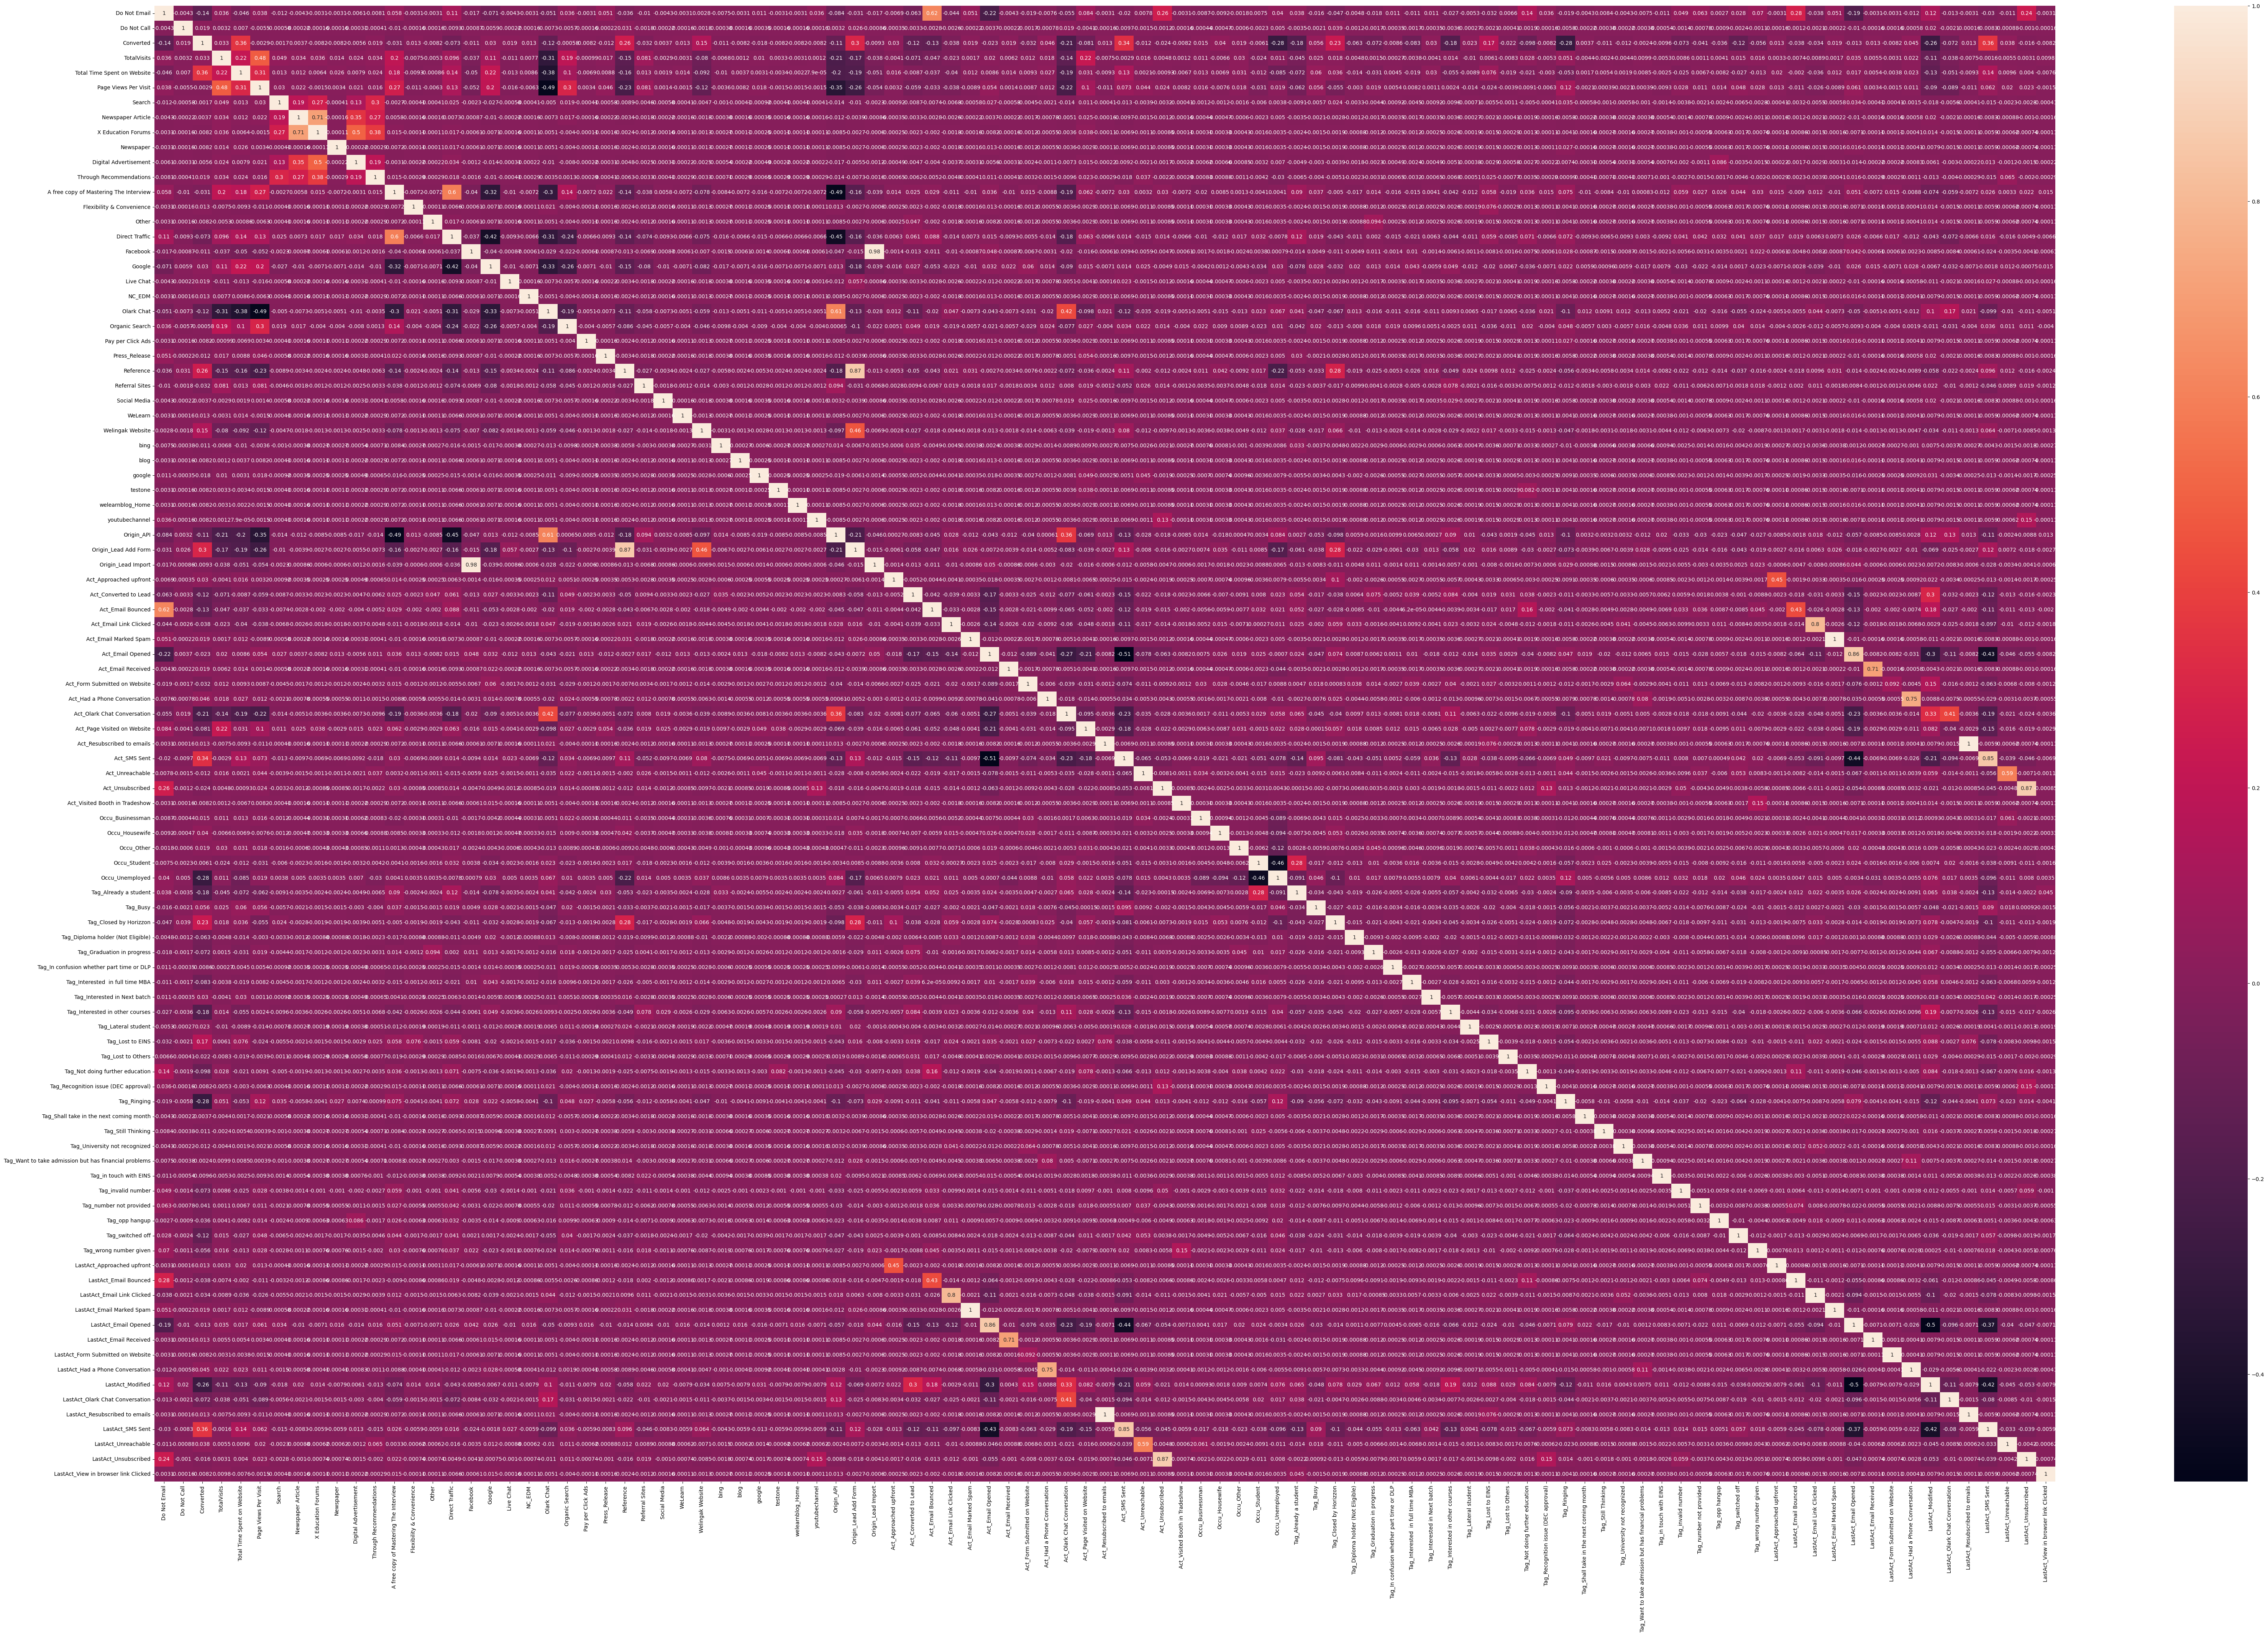

In [ ]:
#Plotting a heat map to understand the correlations
plt.figure(figsize=(80,50))
sns.heatmap(lead_data.corr(), annot=True)
plt.show()

**Dropping the Highly Correlated variables :**

In [ ]:
X_train=X_train.drop(['Newspaper Article','X Education Forums','Direct Traffic','Facebook','Act_Email Bounced','Act_Email Link Clicked','Act_Email Opened',	'Act_Email Received','Act_Had a Phone Conversation','Origin_Lead Import','Origin_API','Act_SMS Sent','Act_Unsubscribed','LastAct_Email Received','LastAct_Modified'],1)

In [ ]:
X_test=X_test.drop(['Newspaper Article','X Education Forums','Direct Traffic','Facebook','Act_Email Bounced','Act_Email Link Clicked','Act_Email Opened',	'Act_Email Received','Act_Had a Phone Conversation','Origin_Lead Import','Origin_API','Act_SMS Sent','Act_Unsubscribed','LastAct_Email Received','LastAct_Modified'],1)

In [ ]:
X_train=X_train.drop(['WeLearn','Flexibility & Convenience'],1)

In [ ]:
X_test=X_test.drop(['WeLearn','Flexibility & Convenience'],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6351, 81)
(2723, 81)


**Checking the correlation after dropping the highly correlated variables :**

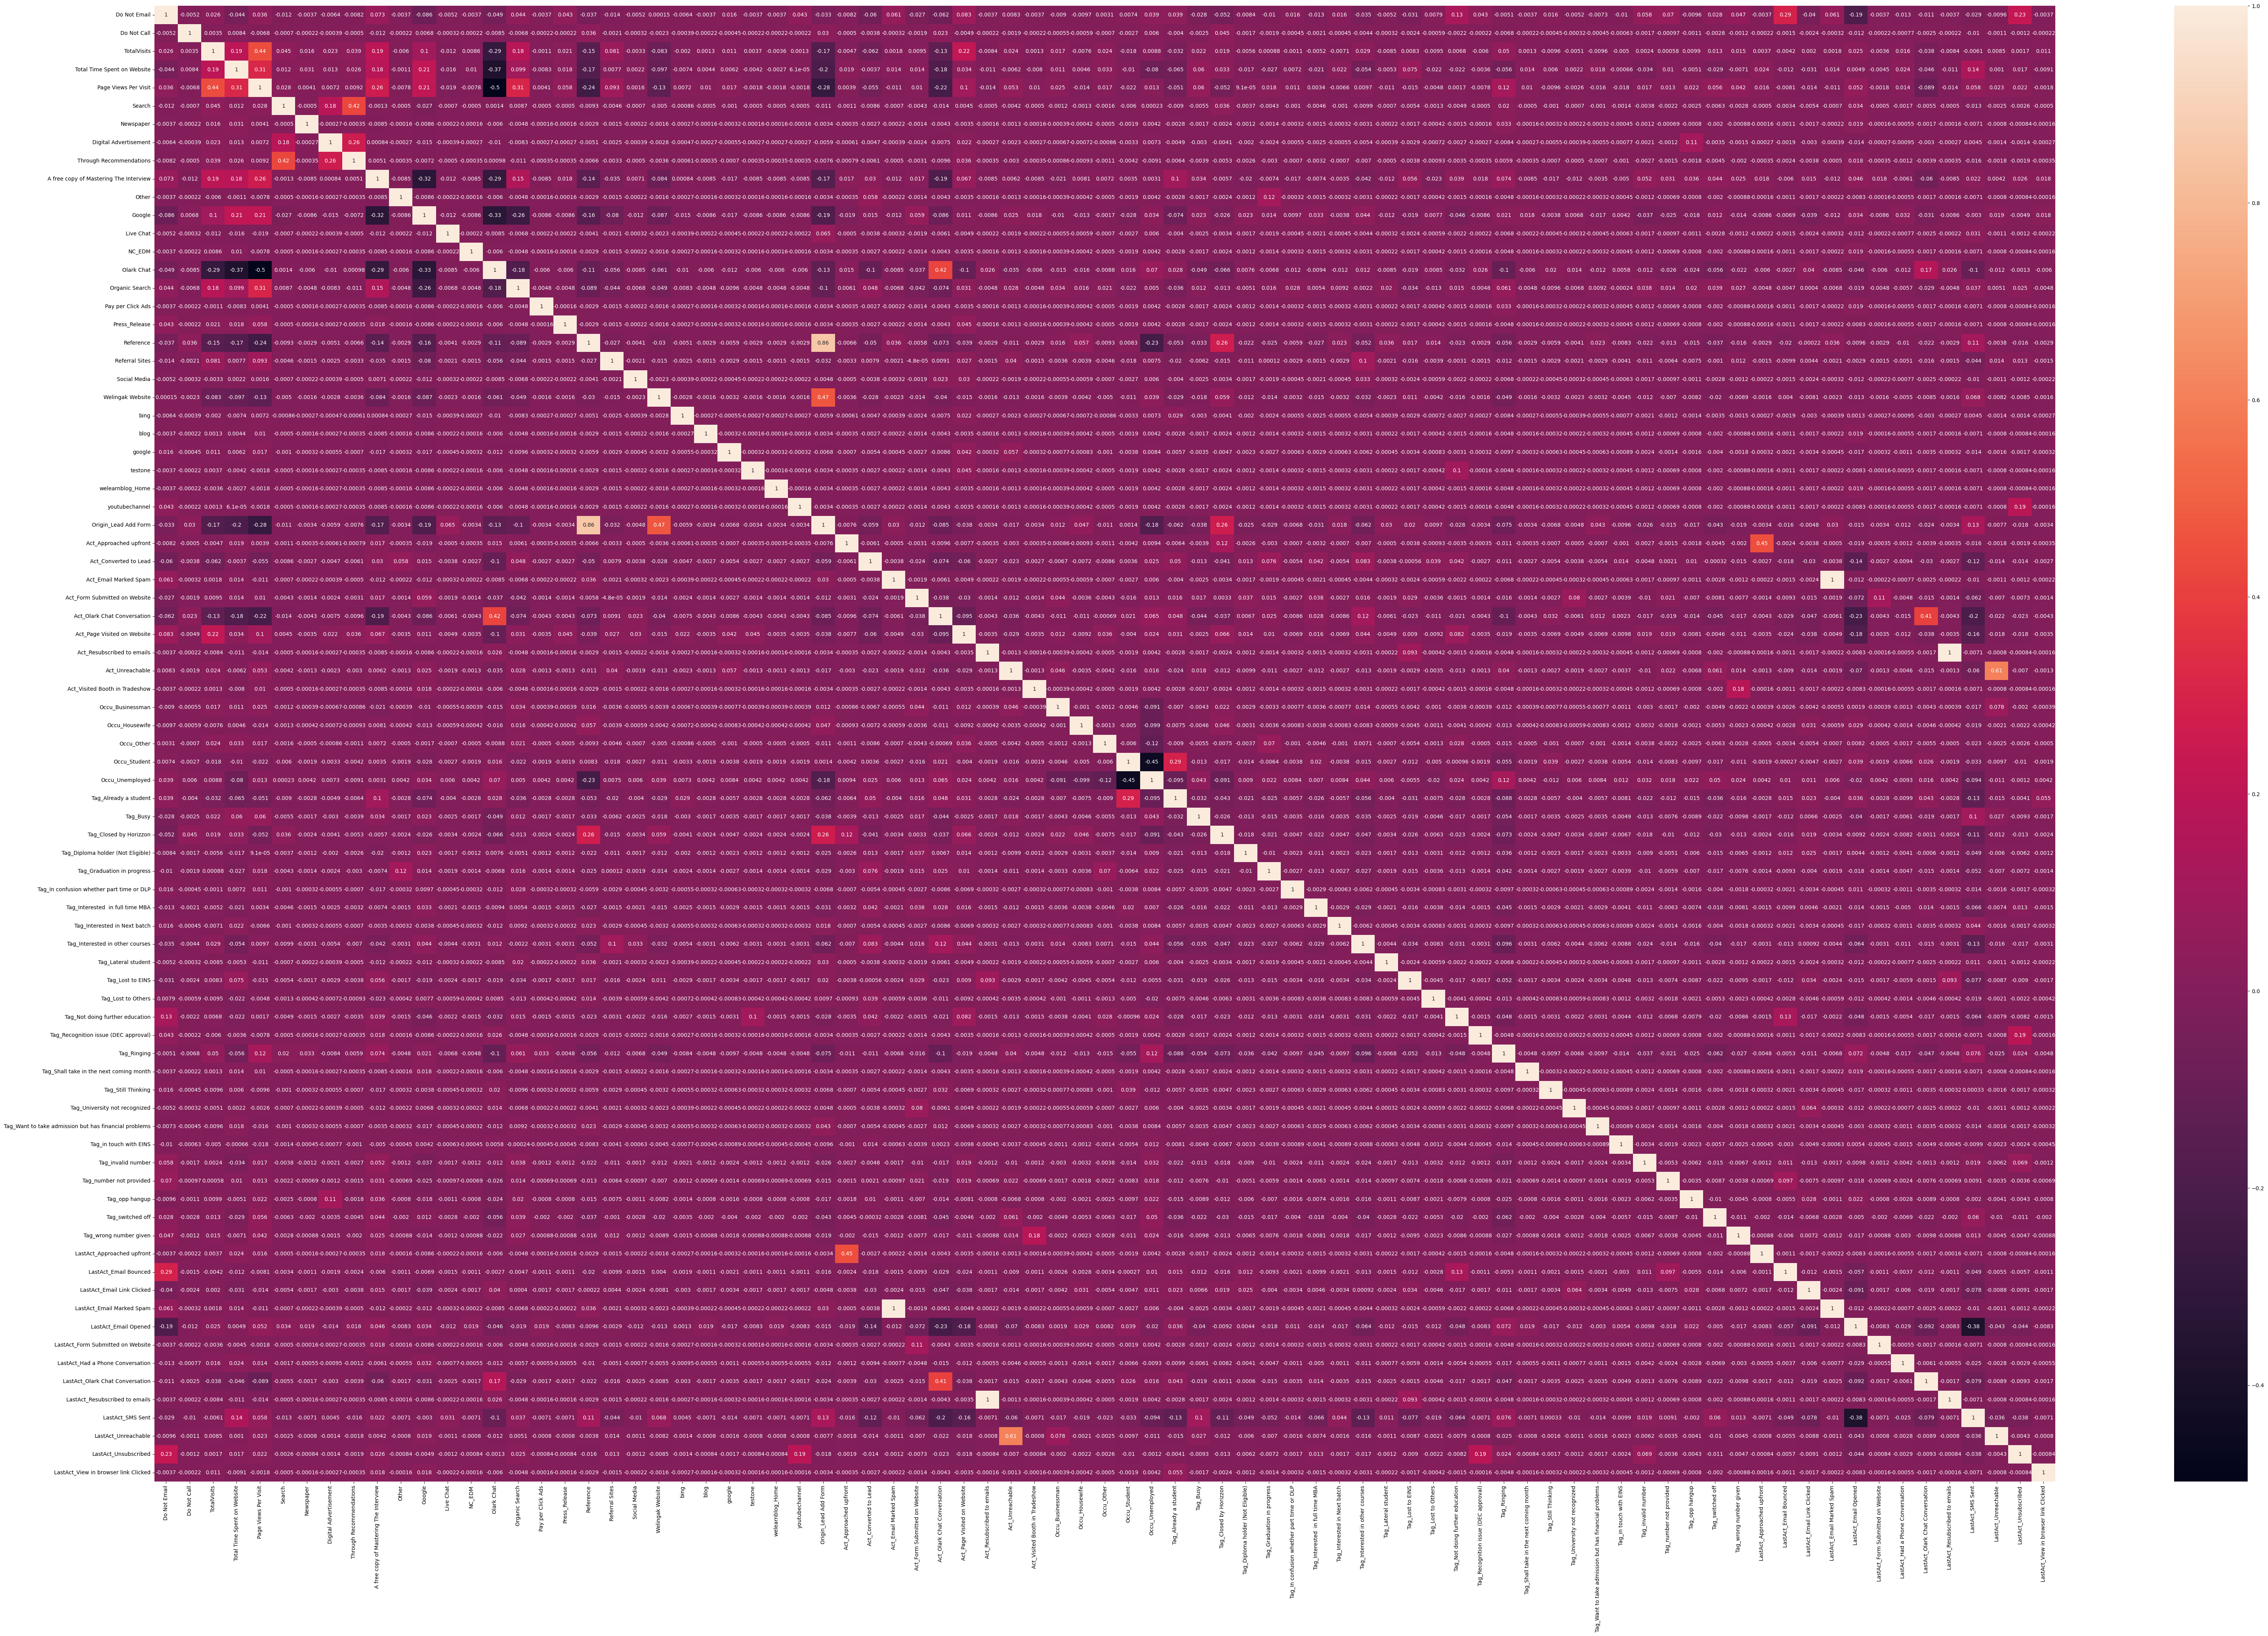

In [ ]:
plt.figure(figsize=(80,50))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

**Model Building :**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Building a Logistic Regression Model
LM=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
LM.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Aug 2023   Deviance:                       79762.
Time:                        10:07:57   Pearson chi2:                 3.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   4.55e+14   4.56e+06   9.98e+07      0.000    4.55e+14    4.55e+14
Do Not Email                                          -4.947e+14   3.63e+06  -1.36e+08      0.000   -4.95e+14   -4.95e+14
Do Not Call                                            6.657e+15   4.76e+07    1.4e+08      0.000    6.66e+15    6.66e+15
TotalVisits                                            6.172e+13   9.73e+05   6.34e+07      0.000    6.17e+13    6.17e+13
Total Time Spent on Website                            4.956e+14      1e+06   4.93e+08      0.000    4.96e+14    4.96e+14
Page Views Per Visit                                  -7.837e+12   1.17e+06  -6.71e+06      0.000   -7.84e+12   -7.84e+12
Search                                                -2.232e+14   2.36e+07  -9.45e+06      0.000   -2.23e+14   -2.23e+14
Newspaper                                             -4.438e+15   6.73e+07   -6.6e+07      0.000   -4.44e+15   -4.44e+15
Digital Advertisement                                  9.199e+14   4.06e+07   2.27e+07      0.000     9.2e+14     9.2e+14
Through Recommendations                               -1.812e+14   3.39e+07  -5.34e+06      0.000   -1.81e+14   -1.81e+14
A free copy of Mastering The Interview                 6.717e+12   2.45e+06   2.74e+06      0.000    6.72e+12    6.72e+12
Other                                                   -1.3e+15   6.77e+07  -1.92e+07      0.000    -1.3e+15    -1.3e+15
Google                                                 1.069e+14   2.75e+06   3.88e+07      0.000    1.07e+14    1.07e+14
Live Chat                                              5.792e+15   5.67e+07   1.02e+08      0.000    5.79e+15    5.79e+15
NC_EDM                                                 4.067e+15   6.72e+07   6.05e+07      0.000    4.07e+15    4.07e+15
Olark Chat                                            -3.576e+14   3.61e+06   -9.9e+07      0.000   -3.58e+14   -3.58e+14
Organic Search                                          3.11e+13   3.03e+06   1.03e+07      0.000    3.11e+13    3.11e+13
Pay per Click Ads                                     -2.484e+15   6.72e+07   -3.7e+07      0.000   -2.48e+15   -2.48e+15
Press_Release                                         -5.569e+15   6.75e+07  -8.26e+07      0.000   -5.57e+15   -5.57e+15
Reference                                              8.299e+13   3.11e+07   2.67e+06      0.000     8.3e+13     8.3e+13
Referral Sites                                         -7.84e+11   7.71e+06  -1.02e+05      0.000   -7.84e+11   -7.84e+11
Social Media                                          -4.516e+14   4.76e+07  -9.49e+06      0.000   -4.52e+14   -4.52e+14
Welingak Website                 

**Feature Selection using RFE :**

RFE is an automated feature elimination that removes the insignificant variables

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,step=25)
rfe=rfe.fit(X_train,y_train)

In [ ]:
# Finding out the variables selected by RFE
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False])

In [ ]:
# Displaying the RFE selected variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 2),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 3),
 ('A free copy of Mastering The Interview', False, 3),
 ('Other', False, 3),
 ('Google', False, 3),
 ('Live Chat', False, 3),
 ('NC_EDM', False, 2),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 3),
 ('Pay per Click Ads', False, 3),
 ('Press_Release', False, 3),
 ('Reference', True, 1),
 ('Referral Sites', False, 3),
 ('Social Media', True, 1),
 ('Welingak Website', True, 1),
 ('bing', False, 3),
 ('blog', False, 2),
 ('google', True, 1),
 ('testone', False, 3),
 ('welearnblog_Home', False, 2),
 ('youtubechannel', False, 3),
 ('Origin_Lead Add Form', True, 1),
 ('Act_Approached upfront', False, 2),
 ('Act_Converted to Lead', True, 1),
 ('Act_Email Marked Spam', True, 1),
 ('Act_Form Submitted 

In [ ]:
#Assigining the variables selected by RFE to a variable called "new"
new=X_train.columns[rfe.support_]

In [ ]:
#columns eliminated by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Other', 'Google',
       'Live Chat', 'NC_EDM', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Referral Sites', 'bing', 'blog', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Act_Approached upfront',
       'Act_Form Submitted on Website', 'Act_Page Visited on Website',
       'Act_Resubscribed to emails', 'Act_Visited Booth in Tradeshow',
       'Occu_Businessman', 'Occu_Housewife', 'Occu_Other',
       'Tag_In confusion whether part time or DLP',
       'Tag_Interested in Next batch', 'Tag_Recognition issue (DEC approval)',
       'Tag_Still Thinking', 'Tag_University not recognized',
       'Tag_in touch with EINS', 'LastAct_Approached upfront',
       'LastAct_Email Link Clicked', 'LastAct_Form Submitted on Website',
       'LastAct_Olark Chat Conversation', 'LastAc

**Model Assessment using the RFE selected variables :**

In [ ]:
X_train.sm=sm.add_constant(X_train[new])
LM2=sm.GLM(y_train,X_train.sm, family=sm.families.Binomial())
Output=LM2.fit()
Output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1619.4
Date:                Tue, 22 Aug 2023   Deviance:                       3238.8
Time:                        10:07:58   Pearson chi2:                 1.01e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5609
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     1.5828      0.266      5.956      0.000       1.062       2.104
Do Not Email                                             -1.8869      0.251     -7.519      0.000      -2.379      -1.395
Total Time Spent on Website                               1.1884      0.055     21.738      0.000       1.081       1.296
Olark Chat                                                0.8808      0.129      6.853      0.000       0.629       1.133
Reference                                                 1.8521      1.164      1.591      0.112      -0.430       4.134
Social Media                                              3.3200      2.118      1.567      0.117      -0.832       7.472
Welingak Website                                          3.3692      1.355      2.487      0.013       0.714       6.024
google                                                  -25.0159   9.41e+04     -0.000      1.000   -1.84e+05    1.84e+05
Origin_Lead Add Form                                      1.7464      1.125      1.552      0.121      -0.458       3.951
Act_Converted to Lead                                    -0.6355      0.273     -2.326      0.020      -1.171      -0.100
Act_Email Marked Spam                                    13.0052   7.52e+04      0.000      1.000   -1.47e+05    1.47e+05
Act_Olark Chat Conversation                              -1.0886      0.202     -5.383      0.000      -1.485      -0.692
Act_Unreachable                                           0.7623      0.734      1.038      0.299      -0.676       2.201
Occu_Student                                             -1.3163      0.462     -2.848      0.004      -2.222      -0.411
Occu_Unemployed                                          -2.9036      0.259    -11.200      0.000      -3.412      -2.395
Tag_Already a student                                    -5.1278      0.741     -6.924      0.000      -6.579      -3.676
Tag_Busy                                                 -0.6837      0.248     -2.756      0.006      -1.170      -0.197
Tag_Closed by Horizzon                                    4.9368      0.734      6.728      0.000       3.499       6.375
Tag_Diploma holder (Not Eligible)                        -4.4646      1.130     -3.953      0.000      -6.678      -2.251
Tag_Graduation in progress                               -1.9924      0.540     -3.692      0.000      -3.050      -0.935
Tag_Interested  in full time MBA                         -3.6160      0.798     -4.532      0.000      -5.180      -2.052
Tag_Interested in other courses                          -3.2091      0.356     -9.011      0.000      -3.907      -2.511
Tag_Lateral student              

**We have many variables whose p-value are greater than 0.05 , which are insignificant variables**

In [ ]:
#Assigning predicted values on the Train set
y_train_pred=Output.predict(X_train.sm)
y_train_pred[:10]

3009   0.33
1012   0.64
9226   0.00
4750   0.98
7987   1.00
1281   0.95
2880   0.18
4971   0.97
7536   0.94
1248   0.01
dtype: float64

In [ ]:
#Coverting the Dataframe to series
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33472022, 0.6384513 , 0.00121605, 0.97668051, 0.99697657,
       0.94641415, 0.17597686, 0.96645681, 0.94050058, 0.01302795])

Creating Data Frame with Converted Flag and Conversion Probabilities:

In [ ]:
y_train_pred_res=pd.DataFrame({'Converted':y_train.values,'Coversion_Prob':y_train_pred})
y_train_pred_res.head()

Converted  Coversion_Prob
0          0            0.33
1          0            0.64
2          0            0.00
3          1            0.98
4          1            1.00

In [ ]:
#Creating new column Predicted with value as 1 if the Conversion Flag >0.5 else 0
y_train_pred_res['predicted'] = y_train_pred_res.Coversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_res.head()

Converted  Coversion_Prob  predicted
0          0            0.33          0
1          0            0.64          1
2          0            0.00          0
3          1            0.98          1
4          1            1.00          1

**Evaluating the Model using Confusion Matrix:**

In [ ]:
from sklearn import metrics

In [ ]:
Confusion=metrics.confusion_matrix(y_train_pred_res.Converted, y_train_pred_res.predicted)
print(Confusion)

[[3653  252]
 [ 369 2077]]


In [ ]:
#Checking the overall Accuracy
print(metrics.accuracy_score(y_train_pred_res.Converted, y_train_pred_res.predicted))

0.9022201228153047


**Checking the VIF values:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Creating a DataFrame to display vif values for all the feature variables
vif=pd.DataFrame()
vif['Feature_Vaiables']=X_train[new].columns
vif['VIF']=[variance_inflation_factor(X_train[new].values,i) for i in range(X_train[new].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

Feature_Vaiables   VIF
9                               Act_Email Marked Spam   inf
34                          LastAct_Email Marked Spam   inf
7                                Origin_Lead Add Form 64.81
3                                           Reference 49.68
5                                    Welingak Website 16.00
13                                    Occu_Unemployed  4.32
35                               LastAct_Email Opened  2.01
37                                   LastAct_SMS Sent  1.88
2                                          Olark Chat  1.82
11                                    Act_Unreachable  1.66
10                        Act_Olark Chat Conversation  1.62
38                                LastAct_Unreachable  1.61
0                                        Do Not Email  1.38
1                         Total Time Spent on Website  1.37
25                                        Tag_Ringing  1.33
14                              Tag_Already a student  1.21
12                                       Occu_Student  1.20
16                             Tag_Closed by Horizzon  1.17
8                               Act_Converted to Lead  1.17
20                    Tag_Interested in other courses  1.15
33                              LastAct_Email Bounced  1.13
39                               LastAct_Unsubscribed  1.08
31                                   Tag_switched off  1.08
24                    Tag_Not doing further education  1.07
22                                   Tag_Lost to EINS  1.05
15                                           Tag_Busy  1.05
27  Tag_Want to take admission but has financial p...  1.04
28                                 Tag_invalid number  1.03
19                   Tag_Interested  in full time MBA  1.03
18                         Tag_Graduation in progress  1.03
29                            Tag_number not provided  1.02
32                             Tag_wrong number given  1.02
17                  Tag_Diploma holder (Not Eligible)  1.02
36                   LastAct_Had a Phone Conversation  1.01
6                                              google  1.01
30                                     Tag_opp hangup  1.01
21                                Tag_Lateral student  1.00
26            Tag_Shall take in the next coming month  1.00
23                                 Tag_Lost to Others  1.00
4                                        Social Media  1.00

We could see variables with VIF as infinity which means there is high collinearity between those variables , hence dropping them

In [ ]:
new=new.drop('Act_Email Marked Spam',1)

In [ ]:
new=new.drop('LastAct_Email Marked Spam',1)

In [ ]:
new=new.drop(['Origin_Lead Add Form','Reference','Welingak Website'],1)

In [ ]:
#Checking the VIF values again
vif=pd.DataFrame()
vif['Feature_Vaiables']=X_train[new].columns
vif['VIF']=[variance_inflation_factor(X_train[new].values,i) for i in range(X_train[new].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif


Feature_Vaiables  VIF
9                                     Occu_Unemployed 4.26
30                               LastAct_Email Opened 1.96
2                                          Olark Chat 1.75
32                                   LastAct_SMS Sent 1.74
7                                     Act_Unreachable 1.66
33                                LastAct_Unreachable 1.61
6                         Act_Olark Chat Conversation 1.61
0                                        Do Not Email 1.37
21                                        Tag_Ringing 1.30
1                         Total Time Spent on Website 1.22
10                              Tag_Already a student 1.21
8                                        Occu_Student 1.20
5                               Act_Converted to Lead 1.17
16                    Tag_Interested in other courses 1.15
29                              LastAct_Email Bounced 1.13
34                               LastAct_Unsubscribed 1.08
20                    Tag_Not doing further education 1.07
27                                   Tag_switched off 1.07
12                             Tag_Closed by Horizzon 1.06
11                                           Tag_Busy 1.05
18                                   Tag_Lost to EINS 1.04
15                   Tag_Interested  in full time MBA 1.03
24                                 Tag_invalid number 1.03
14                         Tag_Graduation in progress 1.03
25                            Tag_number not provided 1.02
13                  Tag_Diploma holder (Not Eligible) 1.02
26                                     Tag_opp hangup 1.01
28                             Tag_wrong number given 1.01
31                   LastAct_Had a Phone Conversation 1.01
4                                              google 1.01
23  Tag_Want to take admission but has financial p... 1.00
22            Tag_Shall take in the next coming month 1.00
19                                 Tag_Lost to Others 1.00
3                                        Social Media 1.00
17                                Tag_Lateral student 1.00

**We have dropped the variables with high VIF values , we do not see any variables with VIF greater than 5**

In [ ]:
X_train.sm=sm.add_constant(X_train[new])
LM3=sm.GLM(y_train,X_train.sm,family=sm.families.Binomial())
output=LM3.fit()
output.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1783.1
Date:                Tue, 22 Aug 2023   Deviance:                       3566.2
Time:                        10:08:01   Pearson chi2:                 9.23e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5377
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     2.0392      0.254      8.015      0.000       1.540       2.538
Do Not Email                                             -1.6019      0.219     -7.300      0.000      -2.032      -1.172
Total Time Spent on Website                               0.9043      0.048     18.652      0.000       0.809       0.999
Olark Chat                                                0.3110      0.120      2.600      0.009       0.077       0.545
Social Media                                              3.0594      1.976      1.548      0.122      -0.813       6.932
google                                                  -24.9931   9.71e+04     -0.000      1.000    -1.9e+05     1.9e+05
Act_Converted to Lead                                    -0.8410      0.265     -3.177      0.001      -1.360      -0.322
Act_Olark Chat Conversation                              -1.1016      0.196     -5.621      0.000      -1.486      -0.717
Act_Unreachable                                           0.5399      0.692      0.780      0.435      -0.817       1.897
Occu_Student                                             -1.2987      0.426     -3.045      0.002      -2.135      -0.463
Occu_Unemployed                                          -3.0423      0.249    -12.209      0.000      -3.531      -2.554
Tag_Already a student                                    -5.3065      0.739     -7.180      0.000      -6.755      -3.858
Tag_Busy                                                 -0.9622      0.247     -3.897      0.000      -1.446      -0.478
Tag_Closed by Horizzon                                    5.5474      0.720      7.705      0.000       4.136       6.959
Tag_Diploma holder (Not Eligible)                        -4.6462      1.121     -4.144      0.000      -6.844      -2.449
Tag_Graduation in progress                               -2.1367      0.527     -4.053      0.000      -3.170      -1.103
Tag_Interested  in full time MBA                         -3.7492      0.785     -4.777      0.000      -5.287      -2.211
Tag_Interested in other courses                          -3.2387      0.345     -9.375      0.000      -3.916      -2.562
Tag_Lateral student                                      25.5504    1.4e+05      0.000      1.000   -2.75e+05    2.75e+05
Tag_Lost to EINS                                          4.7085      0.725      6.494      0.000       3.287       6.130
Tag_Lost to Others                                      -25.1515   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Tag_Not doing further education                          -4.0410      1.040     -3.887      0.000      -6.079      -2.003
Tag_Ringing                      

In [ ]:
y_train_pred=output.predict(X_train.sm)
y_train_pred[:10]

3009   0.43
1012   0.77
9226   0.00
4750   0.98
7987   1.00
1281   0.95
2880   0.28
4971   0.95
7536   0.91
1248   0.01
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42799361, 0.77412981, 0.00126317, 0.9761496 , 0.99604931,
       0.9549886 , 0.28047725, 0.95190244, 0.91158194, 0.01098621])

In [ ]:
y_train_pred_res=pd.DataFrame({'Converted':y_train.values,'Coversion_Prob':y_train_pred})
y_train_pred_res.head()

Converted  Coversion_Prob
0          0            0.43
1          0            0.77
2          0            0.00
3          1            0.98
4          1            1.00

In [ ]:
#Converting new column Predicted with value as 1 if Conversion Flag > 0.5 else 0
y_train_pred_res['predicted'] = y_train_pred_res.Coversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_res.head()

Converted  Coversion_Prob  predicted
0          0            0.43          0
1          0            0.77          1
2          0            0.00          0
3          1            0.98          1
4          1            1.00          1

In [ ]:
#Checking the accuracy again
print(metrics.accuracy_score(y_train_pred_res.Converted,y_train_pred_res.predicted))

0.8866320264525271


All the VIF values are low and Accuracy remains constant after dropping the variables, we are not dropping anymore variables and will start predicting using the same model

In [ ]:
#Checking the confusion Matrix again
Confusion=metrics.confusion_matrix(y_train_pred_res.Converted,y_train_pred_res.predicted)
print(Confusion)

[[3642  263]
 [ 457 1989]]


**Evaluating the Model using other Metrics:**

In [ ]:
TP=Confusion[1,1]
TN=Confusion[0,0]
FP=Confusion[0,1]
FN=Confusion[1,0]


In [ ]:
#Checking the Sensivity of the Model
TP/float(TP+FN)

0.8131643499591169

In [ ]:
#Checking the Specificity
TN/float(TN+FP)

0.9326504481434059

**All the three metrics Accuracy, Sensitivity and Specificity have good numbers for the current model**

**Plotting a ROC Curve:**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_res.Converted, y_train_pred_res.Coversion_Prob, drop_intermediate = False )

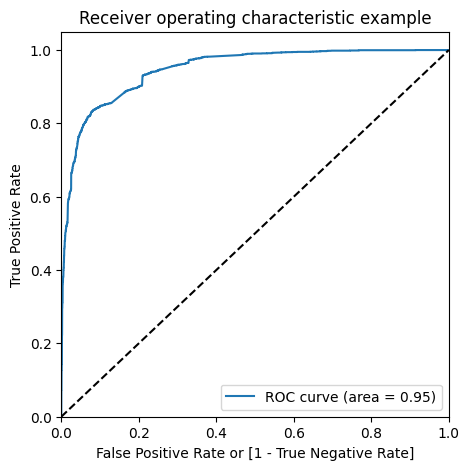

In [ ]:
draw_roc(y_train_pred_res.Converted, y_train_pred_res.Coversion_Prob)

The AUC( Area under the Curve) is very high and it shows that the Model is very good

**Making Predictions on the Test Set:**

In [ ]:
#Feature Scaling of Test set
Scaler=StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3271             0            0         0.10                        -0.60   
1490             0            0         0.30                         1.89   
7936             0            0        -0.28                        -0.75   
4216             0            0        -0.67                        -0.89   
3830             0            0         0.88                        -0.59   

      Page Views Per Visit  Search  Newspaper  Digital Advertisement  \
3271                  0.80       0          0                      0   
1490                  1.28       0          0                      0   
7936                 -0.15       0          0                      0   
4216                 -1.10       0          0                      0   
3830                  2.71       0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  Other  \
3271                        0                                       0      0   
1490                        0                                       1      0   
7936                        0                                       0      0   
4216                        0                                       0      0   
3830                        0                                       1      0   

      Google  Live Chat  NC_EDM  Olark Chat  Organic Search  \
3271       1          0       0           0               0   
1490       0          0       0           0               0   
7936       1          0       0           0               0   
4216       0          0       0           0               0   
3830       0          0       0           0               1   

      Pay per Click Ads  Press_Release  Reference  Referral Sites  \
3271                  0              0          0               0   
1490                  0              0          0               0   
7936                  0              0          0               0   
4216                  0              0          1               0   
3830                  0              0          0               0   

      Social Media  Welingak Website  bing  blog  google  testone  \
3271             0                 0     0     0       0        0   
1490             0                 0     0     0       0        0   
7936             0                 0     0     0       0        0   
4216             0                 0     0     0       0        0   
3830             0                 0     0     0       0        0   

      welearnblog_Home  youtubechannel  Origin_Lead Add Form  \
3271                 0               0                     0   
1490                 0               0                     0   
7936                 0               0                     0   
4216                 0               0                     1   
3830                 0               0                     0   

      Act_Approached upfront  Act_Converted to Lead  Act_Email Marked Spam  \
3271                       0                      0                      0   
1490                       0                      0                      0   
7936                       0                      0                      0   
4216                       0                      0                      0   
3830                       0                      0                      0   

      Act_Form Submitted on Website  Act_Olark Chat Conversation  \
3271                              0                            0   
1490                              0                            0   
7936                              0                            0   
4216                              0                            0   
3830                              0                            0   

      Act_Page Visited on Website  Act_Resubscribed to emails  \
3271                            0                           0   
1490                       

In [ ]:
X_test = X_test[new]
X_test.head()

Do Not Email  Total Time Spent on Website  Olark Chat  Social Media  \
3271             0                        -0.60           0             0   
1490             0                         1.89           0             0   
7936             0                        -0.75           0             0   
4216             0                        -0.89           0             0   
3830             0                        -0.59           0             0   

      google  Act_Converted to Lead  Act_Olark Chat Conversation  \
3271       0                      0                            0   
1490       0                      0                            0   
7936       0                      0                            0   
4216       0                      0                            0   
3830       0                      0                            0   

      Act_Unreachable  Occu_Student  Occu_Unemployed  Tag_Already a student  \
3271                0             0                1                      0   
1490                0             0                0                      0   
7936                0             0                1                      0   
4216                0             1                0                      0   
3830                0             0                1                      0   

      Tag_Busy  Tag_Closed by Horizzon  Tag_Diploma holder (Not Eligible)  \
3271         0                       0                                  0   
1490         0                       0                                  0   
7936         0                       0                                  0   
4216         0                       1                                  0   
3830         0                       0                                  0   

      Tag_Graduation in progress  Tag_Interested  in full time MBA  \
3271                           0                                 0   
1490                           0                                 0   
7936                           0                                 0   
4216                           0                                 0   
3830                           0                                 0   

      Tag_Interested in other courses  Tag_Lateral student  Tag_Lost to EINS  \
3271                                0                    0                 0   
1490                                0                    0                 0   
7936                                0                    0                 0   
4216                                0                    0                 0   
3830                                0                    0                 0   

      Tag_Lost to Others  Tag_Not doing further education  Tag_Ringing  \
3271                   0                                0            0   
1490                   0                                0            0   
7936                   0                                0            0   
4216                   0                                0            0   
3830                   0                                0            0   

      Tag_Shall take in the next coming month  \
3271                                        0   
1490                                        0   
7936                                        0   
4216                                        0   
3830                                        0   

      Tag_Want to take admission but has financial problems  \
3271                                                  0       
1490                                                  0       
7936                                                  0       
4216                                                  0       
3830                                                  0       

      Tag_invalid number  Tag_number not provided  Tag_opp hangup  \
3271                   0                        0               0   
1490                   0             

In [ ]:
#Adding a Constant to the Test set
X_test_sm=sm.add_constant(X_test)

In [ ]:
y_test_pred=output.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

3271   0.33
1490   0.99
7936   0.30
4216   1.00
3830   0.34
1800   0.90
6507   0.03
4821   0.01
4223   0.81
4714   0.18
dtype: float64

In [ ]:
#Converting y_test_pred into a dataframe

y_test_df=pd.DataFrame(y_test_pred)

y_test_df.head()

0
3271 0.33
1490 0.99
7936 0.30
4216 1.00
3830 0.34

In [ ]:
#Converting y_test into a Dataframe

y_test_1=pd.DataFrame(y_test)

y_test_1.head()

Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [ ]:
# Putting CustID to index
y_test_1['LeadID'] = y_test_1.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_test_df.reset_index(drop=True,inplace=True)
y_test_1.reset_index(drop=True,inplace=True)

y_pred_final=pd.concat([y_test_df,y_test_1], axis=1)

In [ ]:
y_pred_final.head()

0  Converted  LeadID
0 0.33          0    3271
1 0.99          1    1490
2 0.30          0    7936
3 1.00          1    4216
4 0.34          0    3830

In [ ]:
#Renaming the Columns for better readability

y_pred_final=y_pred_final.rename(columns={0:'Conversion_Prob'})

y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [ ]:
y_pred_final.head()

LeadID  Converted  Conversion_Prob
0    3271          0             0.33
1    1490          1             0.99
2    7936          0             0.30
3    4216          1             1.00
4    3830          0             0.34

In [ ]:
y_pred_final['Predicted']=y_pred_final.Conversion_Prob.map(lambda x:1 if x>0.5 else 0)

y_pred_final.head()

LeadID  Converted  Conversion_Prob  Predicted
0    3271          0             0.33          0
1    1490          1             0.99          1
2    7936          0             0.30          0
3    4216          1             1.00          1
4    3830          0             0.34          0

In [ ]:
#Checking the Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)

0.8810135879544619

In [ ]:
#Confusion MAtrix
Confusion_Mat=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)

Confusion_Mat

array([[1611,  123],
       [ 201,  788]])

In [ ]:
TP = Confusion_Mat[1,1] # true positive
TN = Confusion_Mat[0,0] # true negatives
FP = Confusion_Mat[0,1] # false positives
FN = Confusion_Mat[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7967644084934277

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9290657439446367

**Finding the Optimal Cut Off:**

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_res[i]= y_train_pred_res.Coversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_res.head()

Converted  Coversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0            0.43          0    1    1    1    1    1    0    0   
1          0            0.77          1    1    1    1    1    1    1    1   
2          0            0.00          0    1    0    0    0    0    0    0   
3          1            0.98          1    1    1    1    1    1    1    1   
4          1            1.00          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    1    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_res.Converted, y_train_pred_res[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.77   0.98   0.65
0.20  0.20      0.83   0.94   0.75
0.30  0.30      0.84   0.90   0.81
0.40  0.40      0.88   0.84   0.90
0.50  0.50      0.89   0.81   0.93
0.60  0.60      0.88   0.78   0.95
0.70  0.70      0.87   0.73   0.96
0.80  0.80      0.85   0.67   0.97
0.90  0.90      0.79   0.48   0.99


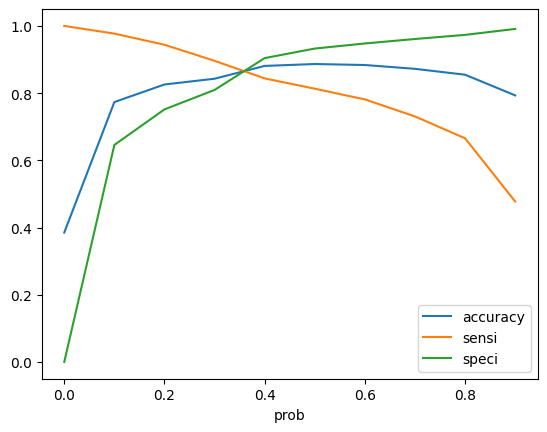

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the above graph choosing 0.4 as a Cut-off to determine the probability:

In [ ]:
y_pred_final['Predicted']=y_pred_final.Conversion_Prob.map(lambda x:1 if x>0.4 else 0)

y_pred_final.head()

LeadID  Converted  Conversion_Prob  Predicted
0    3271          0             0.33          0
1    1490          1             0.99          1
2    7936          0             0.30          0
3    4216          1             1.00          1
4    3830          0             0.34          0

In [ ]:
#Checking the Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)

0.876239441792141

In [ ]:
#Confusion MAtrix
Confusion_Final=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)

Confusion_Final

array([[1562,  172],
       [ 165,  824]])

In [ ]:
TP = Confusion_Final[1,1] # true positive
TN = Confusion_Final[0,0] # true negatives
FP = Confusion_Final[0,1] # false positives
FN = Confusion_Final[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.833164812942366

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9008073817762399

**Assigning Lead Score:**

In [ ]:
y_pred_final['Lead_Score']=y_pred_final.Conversion_Prob.map(lambda X:round(X*100))

y_pred_final.head()

LeadID  Converted  Conversion_Prob  Predicted  Lead_Score
0    3271          0             0.33          0          33
1    1490          1             0.99          1          99
2    7936          0             0.30          0          30
3    4216          1             1.00          1         100
4    3830          0             0.34          0          34

**Finding out Hot Leads:**

In [ ]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=90]

hot_leads

LeadID  Converted  Conversion_Prob  Predicted  Lead_Score
1       1490          1             0.99          1          99
3       4216          1             1.00          1         100
5       1800          1             0.90          1          90
16      1946          1             0.94          1          94
23      5822          1             0.99          1          99
25      2684          1             0.99          1          99
27      4809          1             0.95          1          95
33      4062          1             0.99          1          99
35      7696          1             0.99          1          99
36      9049          1             0.96          1          96
46      1518          1             0.96          1          96
48      3765          1             0.91          1          91
52      4543          1             0.99          1          99
54      4830          1             0.95          1          95
55      1158          1             0.93          1          93
57      4365          1             0.92          1          92
59      7596          1             0.98          1          98
63      7546          1             0.94          1          94
74      7347          1             0.97          1          97
75      2504          1             0.97          1          97
77      5913          1             0.95          1          95
85      2896          1             0.99          1          99
100     4003          1             0.98          1          98
106     4963          1             0.98          1          98
107     6947          1             0.98          1          98
109     2556          1             0.91          1          91
112     4807          1             0.98          1          98
115      789          1             1.00          1         100
117     8372          1             0.92          1          92
119     5805          1             0.99          1          99
120     1586          1             0.95          1          95
129     4478          1             0.96          1          96
130     3758          1             0.98          1          98
135     7984          1             0.99          1          99
145     9034          1             0.97          1          97
151     3631          1             0.97          1          97
165     8286          1             0.98          1          98
170     4047          1             0.96          1          96
181     1436          1             0.99          1          99
184     7552          1             1.00          1         100
197     5173          1             0.97          1          97
201     4080          1             0.97          1          97
203     1475          1             0.98          1          98
204     3838          1             0.99          1          99
215     5785          1             0.99          1          99
219     6560          1             0.90          1          90
240     4297          1             1.00          1         100
244     4091          1             1.00          1         100
249      200          1             0.94          1          94
250     5860          1             0.97          1          97
252     5490          1             0.98          1          98
261     6532          1             0.97          1          97
279     4498          1             0.98          1          98
280     5797          1             0.99          1          99
282     8687          1             0.98          1          98
287     7653          1             1.00          1         100
290      572          1             0.90          1          90
293     4149          1             0.98          1          98
299       76          1             0.96          1          96
308     8255          1             0.94          1          94
310     8233          1             0.98          1          98
319     1300          1             0.